<a href="https://colab.research.google.com/github/adhile/Cat_Dog/blob/main/CNN_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# go to Kaggle-->download Kaggle API json file--->store it in **drive**

# Kaggle API

In [ ]:
!mkdir -p /root/.kaggle


In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle_api/kaggle.json /root/.kaggle/kaggle.json

In [ ]:
!ls ~/.kaggle


kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


# downlaod dataset

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog


 99% 216M/218M [00:08<00:00, 26.3MB/s]
100% 218M/218M [00:08<00:00, 25.8MB/s]


In [ ]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

# Data cleaning

In [ ]:
import torch
import os
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from PIL import Image
# for getting summary info on models
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# training data set

In [ ]:
# Define the directory path
directory = 'training_set/training_set'

# Initialize empty lists to store image data and labels
images = []
labels = []

# Iterate through the subdirectories (cat and dog)
for label in os.listdir(directory):
    subdirectory = os.path.join(directory, label)
    if os.path.isdir(subdirectory):
        # Iterate through the image files
        for filename in os.listdir(subdirectory):
            if filename.endswith('.jpg'):
                # Open the image using PIL
                image_path = os.path.join(subdirectory, filename)
                image = Image.open(image_path)

                # Convert the image to numpy array
                data = np.array(image)

                # Append the image data and label
                images.append(data)
                labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Convert labels to numeric values (0 for 'cat' and 1 for 'dog')
labels_numeric = np.where(labels=='cats',0,1)

# Print the shape of the images and labels arrays
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (8005,)
Labels shape: (8005,)


<ipython-input-12-1fff9cc89bcd>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [ ]:
np.set_printoptions(threshold=np.inf)  # Set threshold to infinite
print(labels_numeric)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# Reshape images into a consistant size

In [ ]:
# Reshape the images to a consistent size
resized_images = []
desired_size = (28, 28)

for img in images:
    img = Image.fromarray(img)
    img = img.resize(desired_size, Image.ANTIALIAS).convert('L')
    resized_images.append(np.array(img))


# Data Normalization and reshape into 2D

In [ ]:
# normalize the data to a range of [0 1]
dataNorm = np.array(resized_images,dtype=np.float32) / 255.0
# NEW: reshape to 2D!

dataNorm = dataNorm.reshape(dataNorm.shape[0],1,28,28)

print(dataNorm.shape)
print(type(dataNorm.shape))

# Convert the data to PyTorch tensor
data_tensor = torch.from_numpy(dataNorm)



(8005, 1, 28, 28)
<class 'tuple'>


In [ ]:
# Convert the data to PyTorch tensor
data_tensor = torch.from_numpy(dataNorm)
labels_tensor = torch.from_numpy(labels_numeric)

data_tensor.shape

torch.Size([8005, 1, 28, 28])

# Test data set preperation

In [ ]:
# Define the directory path
test_directory = 'test_set/test_set'

# Initialize empty lists to store image data and labels
test_images = []
test_labels = []

# Iterate through the subdirectories (cat and dog)
for label in os.listdir(test_directory):
    subdirectory = os.path.join(directory, label)
    if os.path.isdir(subdirectory):
        # Iterate through the image files
        for filename in os.listdir(subdirectory):
            if filename.endswith('.jpg'):
                # Open the image using PIL
                image_path = os.path.join(subdirectory, filename)
                image = Image.open(image_path)

                # Convert the image to numpy array
                data = np.array(image)

                # Append the image data and label
                test_images.append(data)
                test_labels.append(label)

# Convert the lists to numpy arraystest_
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Convert labels to numeric values (0 for 'cat' and 1 for 'dog')
test_labels_numeric = np.where(test_labels == 'cats', 0, 1)

# Print the shape of the images and labels arrays
print('Images shape:', test_images.shape)
print('Labels shape:', test_labels.shape)

# Reshape the images to a consistent size
test_resized_images = []
desired_size = (28, 28)

for img in test_images:
    img = Image.fromarray(img)
    img = img.resize(desired_size, Image.ANTIALIAS).convert('L')
    test_resized_images.append(np.array(img))

# normalize the data to a range of [0 1]
test_dataNorm = np.array(test_resized_images,dtype=np.float32) / 255.0
# NEW: reshape to 2D!

test_dataNorm = test_dataNorm.reshape(test_dataNorm.shape[0],1,28,28)

print(test_dataNorm.shape)
print(type(test_dataNorm.shape))

# Convert the data to PyTorch tensor
test_data_tensor = torch.from_numpy(test_dataNorm)

# Convert the data to PyTorch tensor
test_data_tensor = torch.from_numpy(test_dataNorm)
test_labels_tensor = torch.from_numpy(test_labels_numeric)

test_data_tensor.shape


<ipython-input-17-12825d6912c2>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_images = np.array(test_images)


Images shape: (8005,)
Labels shape: (8005,)
(8005, 1, 28, 28)
<class 'tuple'>


torch.Size([8005, 1, 28, 28])

# Create The DL Model

In [ ]:
# Define the CNN model
def createCnnModel():
  class CNNModel(nn.Module):
      def __init__(self):
          super().__init__()
          self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
          self.relu1 = nn.ReLU()
          self.maxpool1 = nn.MaxPool2d(kernel_size=2)
          self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
          self.relu2 = nn.ReLU()
          self.maxpool2 = nn.MaxPool2d(kernel_size=2)
          self.fc = nn.Linear(32 * 7 * 7, 2)

      def forward(self, x):
          x = self.conv1(x)
          x = self.relu1(x)
          x = self.maxpool1(x)
          x = self.conv2(x)
          x = self.relu2(x)
          x = self.maxpool2(x)
          x = x.view(x.size(0), -1)
          x = self.fc(x)
          return x

  # Create an instance of the CNN model
  model = CNNModel()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.Adam(model.parameters(),lr=.001)

  return model,lossfun,optimizer


# Train Model-basic


In [ ]:
# # number of epochs
# numepochs = 500

# #create model
# model,lossfun,optimizer=createCnnModel()

# #initialize losses
# losses=torch.zeros(numepochs)

# #loop over epochs
# for epochi in range(numepochs):
#   # forward pass and loss
#       yHat = model(data_tensor)
#       loss = lossfun(yHat,labels_tensor)
#       losses[epochi] = loss

#       # backprop
#       optimizer.zero_grad()
#       loss.backward()
#       optimizer.step()



In [ ]:
# show the losses

# plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title("Training Loss")
# plt.show()

In [ ]:
# Calculate the total accuracy
# with torch.no_grad():
#     # Forward pass on the entire dataset
#     outputs = model(data_tensor)
#     _, predicted_labels = torch.max(outputs.data, 1)

#     # Calculate accuracy
#     total_accuracy = (predicted_labels == labels_tensor).sum().item() / len(labels_tensor)
#     total_accuracy_percentage = total_accuracy * 100
# print(f'Total Accuracy: {total_accuracy_percentage:.4f}')

Total Accuracy: 100.0000


# Train and Evaluate the model

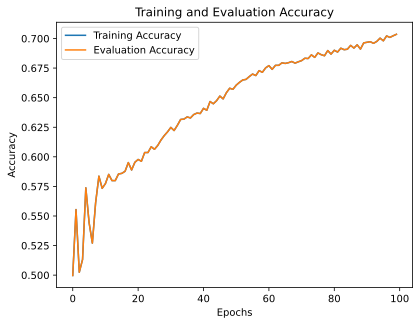

In [ ]:
# number of epochs
numepochs = 100

# Create model
model, lossfun, optimizer = createCnnModel()

# Initialize losses
losses = torch.zeros(numepochs)
train_accuracies = []
eval_accuracies = []

# Loop over epochs
for epochi in range(numepochs):
    # Forward pass and loss calculation
    yHat = model(data_tensor)
    loss = lossfun(yHat, labels_tensor)
    losses[epochi] = loss.item()

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Perform evaluation
    model.eval()
    with torch.no_grad():
        # Forward pass on the evaluation data
        eval_outputs = model(test_data_tensor)
        _, eval_predicted_labels = torch.max(eval_outputs.data, 1)

        # Calculate evaluation accuracy
        eval_accuracy = (eval_predicted_labels == test_labels_tensor).float().mean().item()
        eval_accuracies.append(eval_accuracy)

    # Calculate training accuracy
    train_outputs = model(data_tensor)
    _, train_predicted_labels = torch.max(train_outputs.data, 1)
    train_accuracy = (train_predicted_labels == labels_tensor).float().mean().item()
    train_accuracies.append(train_accuracy)

# Plot the training and evaluation accuracies
epochs = range(numepochs)

plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, eval_accuracies, label='Evaluation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Evaluation Accuracy')
plt.legend()
plt.show()



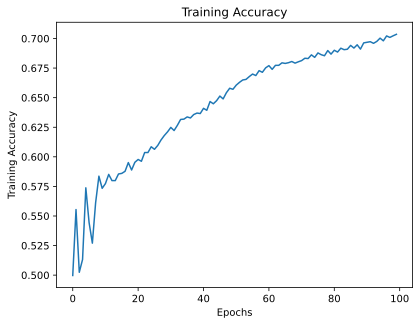

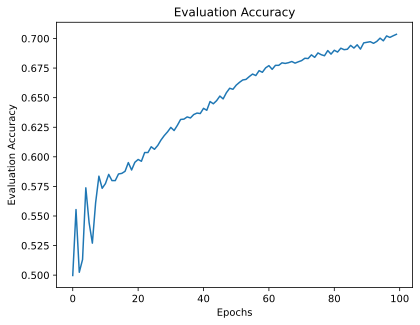

70.35602927207947
70.35602927207947


In [ ]:
plt.plot(epochs, train_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.show()

# Plot the evaluation accuracy
plt.plot(epochs, eval_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.title('Evaluation Accuracy')
plt.show()



# test the Prediction of model with an image

In [ ]:

# Define the predict function
def predict(image):
    # Convert the RGB image to grayscale
    image_gray = image.convert('L')

    # Resize the image to match the input size of the model
    image_gray = image_gray.resize((28, 28))

    # Convert the image to a numpy array
    image_array = np.array(image_gray)

    # Normalize the image data
    image_norm = image_array / 255.0

    # Reshape the image to match the input shape of the model
    image_norm = image_norm.reshape(1, 1, 28, 28)

    # Convert the numpy array to a PyTorch tensor
    predict_image_tensor = torch.from_numpy(image_norm).float()

    # Perform inference using your model
    with torch.no_grad():
        model.eval()
        output = model(predict_image_tensor)
        predicted_label = torch.argmax(output).item()

    # Return the predicted label
    return 'cat' if predicted_label == 0 else 'dog'


In [ ]:
image = Image.open('/content/training_set/training_set/cats/cat.1004.jpg')
predict(image)

'cat'

In [ ]:
image = Image.open('/content/training_set/training_set/dogs/dog.1010.jpg')
predict(image)

'dog'